## Project Name: Algerian Forest Fires, EDA, FE & Predictions using Logistic Regression


## 1) Problem Statement:
- Here we're having Algerian Forest Fires Data
- We're required to predict whether or not there will be fires in Algerian Forests based on various features/predcitors
- Fire/Not Fire is our Response Variable, that's why we're using Logistic Regressin Algorithm

## 2) Data Collection:
- Data for this project is taken from the open source platform- `UCI ML Repository`
- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- 122 instances for each region.

- The period from June 2012 to September 2012.
- The data contains 246 rows, 13 predictors and 1 response variable

### 2.1 Importing Data & Requisite Packages

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [100]:
data_algerian = pd.read_csv(r'C:\Users\pc\Downloads\Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [101]:
data_algerian.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Attributes Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- **Weather data observations**
    1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    2. RH : Relative Humidity in %: 21 to 90
    3. Ws :Wind speed in km/h: 6 to 29
    4. Rain: total day in mm: 0 to 16.8
    
- **FWI Components**
    1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    3. Drought Code (DC) index from the FWI system: 7 to 220.4
    4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    6. Fire Weather Index (FWI) Index: 0 to 31.1
    7. Classes: two classes, namely Fire & Not Fire

In [102]:
data_algerian.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [103]:
data_algerian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [104]:
data_algerian.shape

(246, 14)

In [105]:
data_algerian.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [106]:
data_algerian.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [107]:
data_algerian.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [109]:
data_algerian.iloc[120:125, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


## Data Cleaning

In [110]:
# Dropping the rows 122 & 123
data_algerian.drop(index=[122, 123], inplace=True)
# We don't have to remove the first line in the csv file bcoz we've already chosen header as row=1

In [117]:
# Resetting the Index & Dropping the Index column
data_algerian.reset_index(inplace=True)
data_algerian.drop(labels=['index'], axis=1, inplace=True)

In [118]:
data_algerian.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Creating a new feature/column named as Region
- Region = 0: Bejaja, 1: Sidi Bel-Abbes

In [130]:
data_algerian.loc[:122, 'Region'] = int(0)
data_algerian.loc[122:, 'Region'] = int(1)

In [133]:
data_algerian['Region'] = data_algerian['Region'].astype(int)

In [134]:
data_algerian.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [135]:
data_algerian.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [137]:
data_algerian[['day', 'month', 'year', 'Temperature', ' RH', ' Ws',"Region"]]=data_algerian[['day', 'month', 'year', 'Temperature', ' RH', ' Ws',"Region"]].astype(int)

In [155]:
features = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

In [156]:
data_algerian.columns = features

In [144]:
data_algerian.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

### Dropping the missing values

In [150]:
data_algerian.dropna(inplace=True)

#### Values in Classes columns have unnecessary spaces that are removed by df.strip()

In [151]:
data_algerian['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [152]:
data_algerian['Classes'] = data_algerian['Classes'].str.strip()
data_algerian['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### Converting the necessary columns into float data type

In [158]:
data_algerian[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data_algerian[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')


In [159]:
data_algerian.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

#### Dropping the year column as the data is of the same year

In [160]:
data_algerian.drop(labels=['year'], axis=1, inplace=True)

### Describing DataFrame

In [161]:
data_algerian.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [162]:
data_algerian.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## 3) Exploratory Data Analysis

In [163]:
# Encoding the Classes
# Fire: 0, Not Fire: 1
from sklearn.preprocessing import LabelEncoder

In [164]:
label_encoder = LabelEncoder()

In [165]:
set(data_algerian['Classes'])

{'fire', 'not fire'}

In [166]:
data_algerian['Classes'] = label_encoder.fit_transform(data_algerian['Classes'])
data_algerian.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [167]:
data_algerian.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


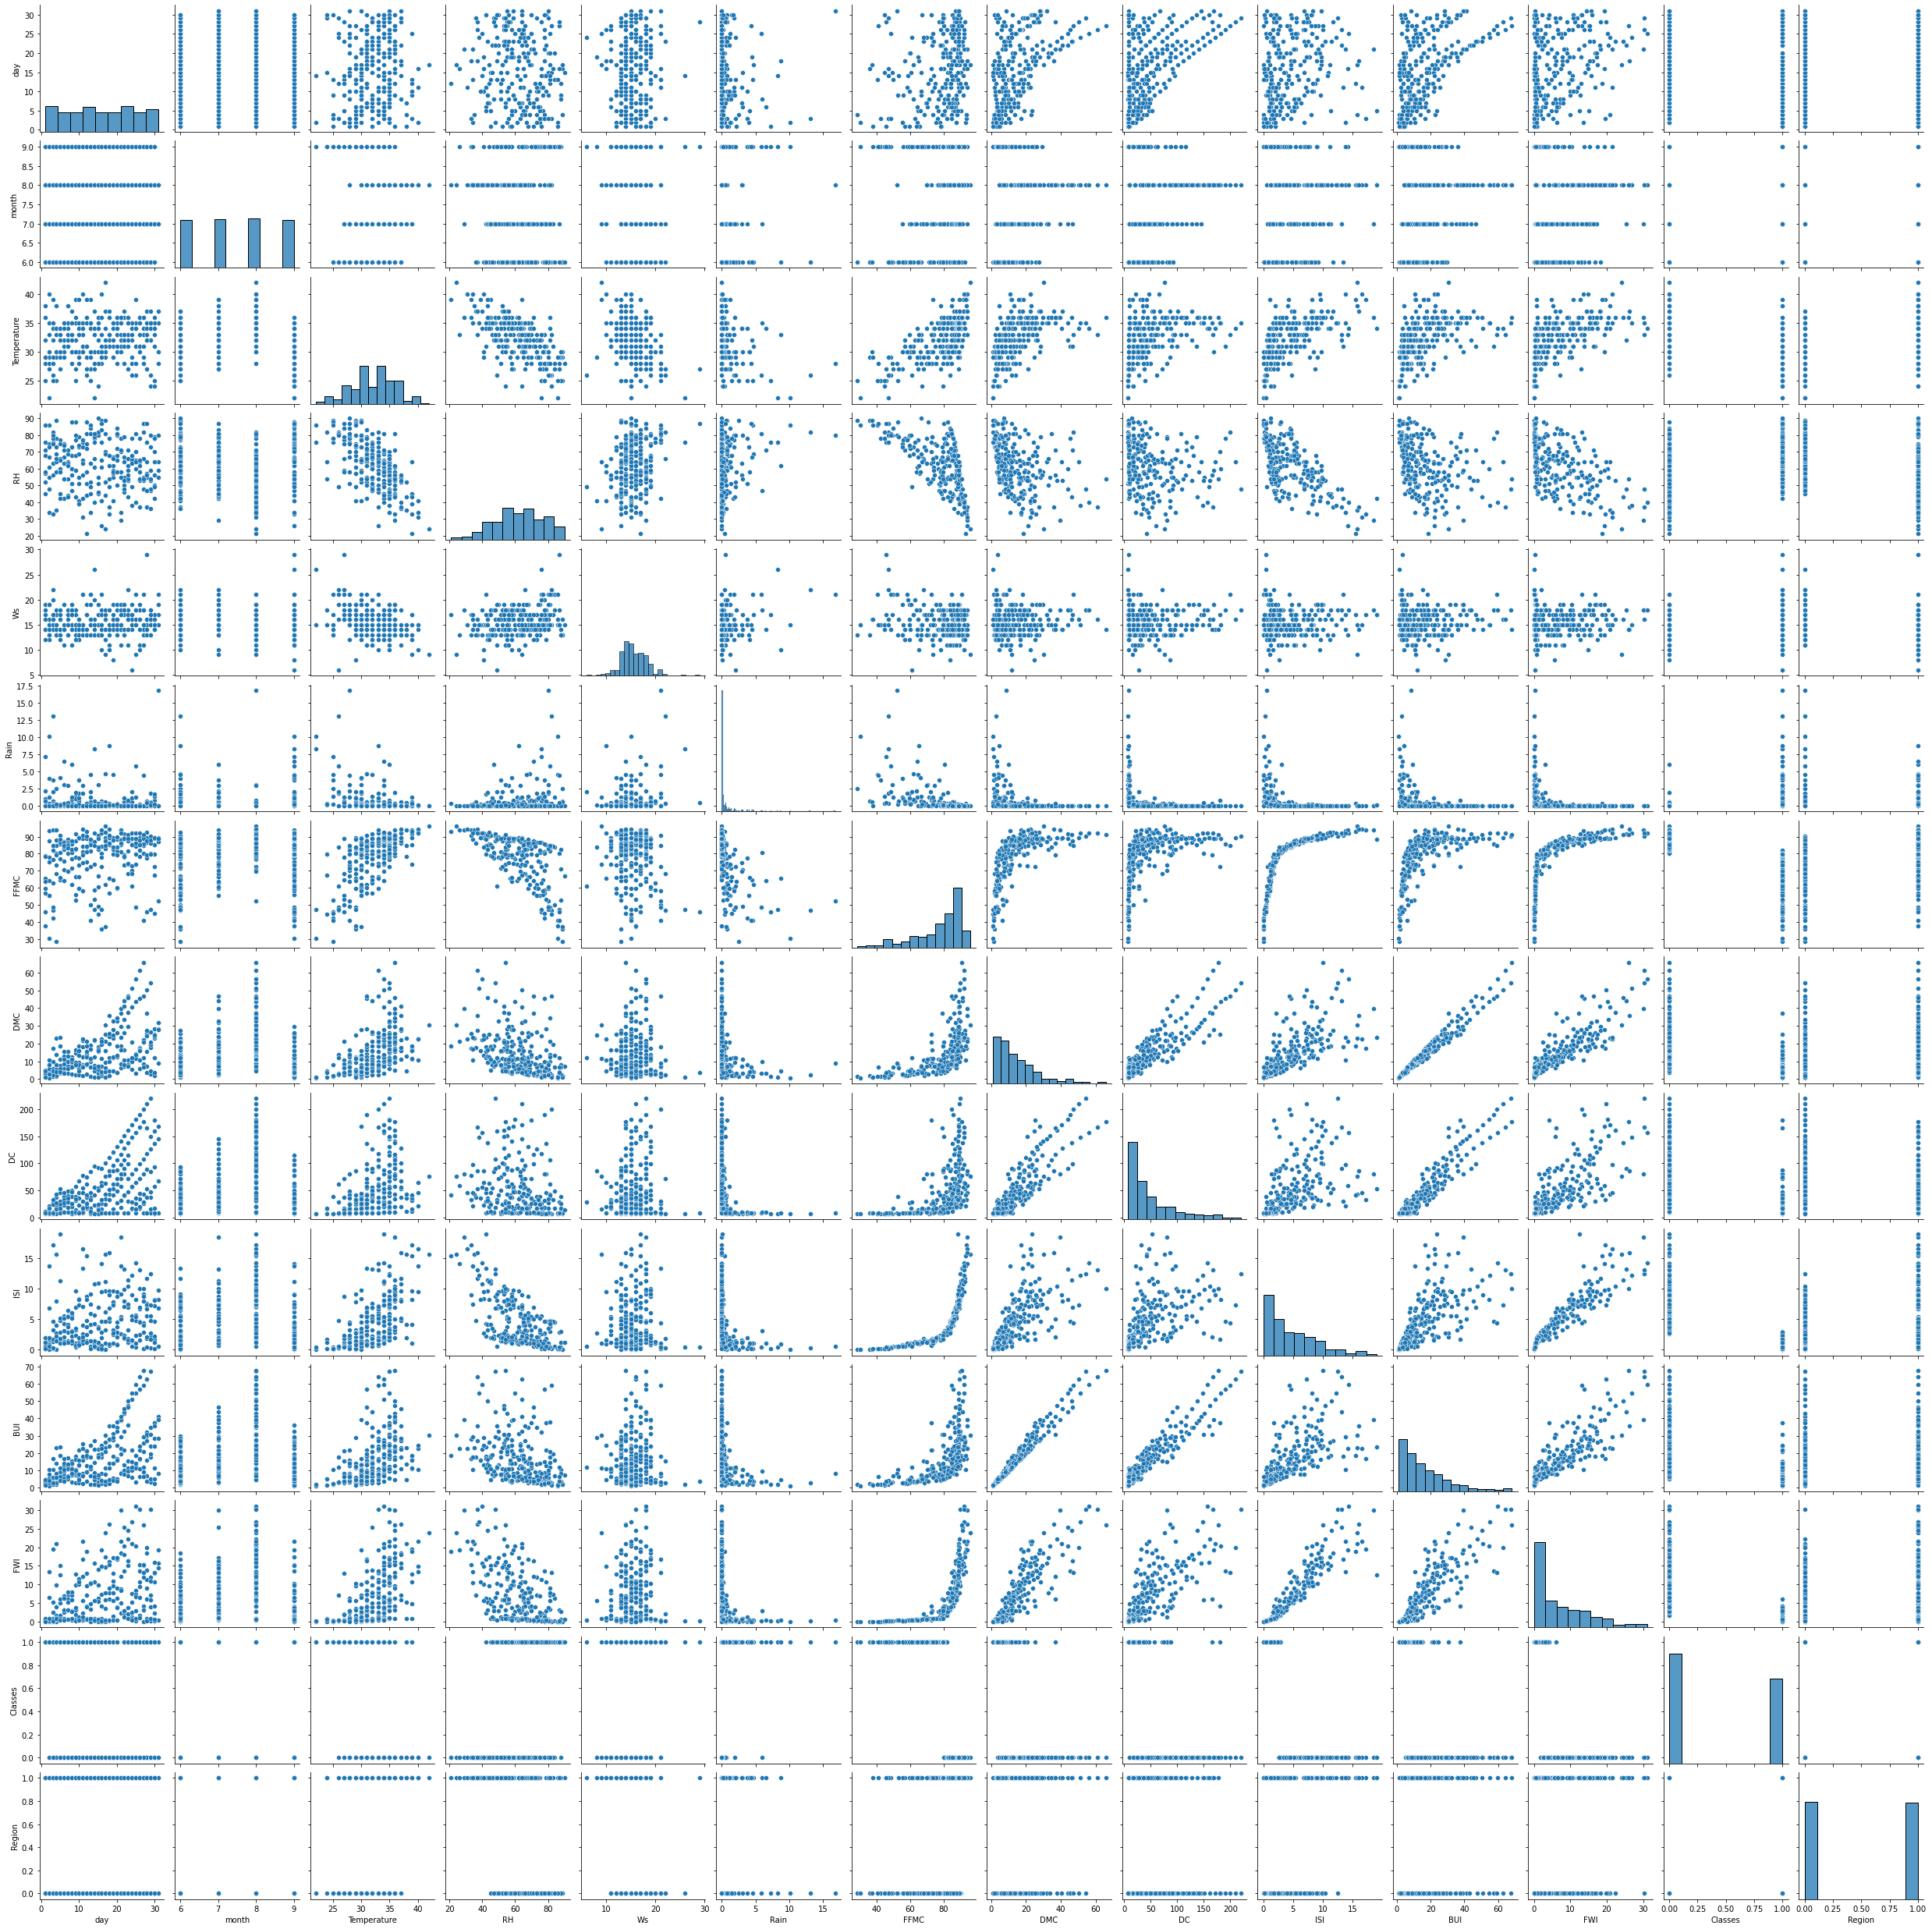

In [168]:
sns.pairplot(data_algerian)

<AxesSubplot: >

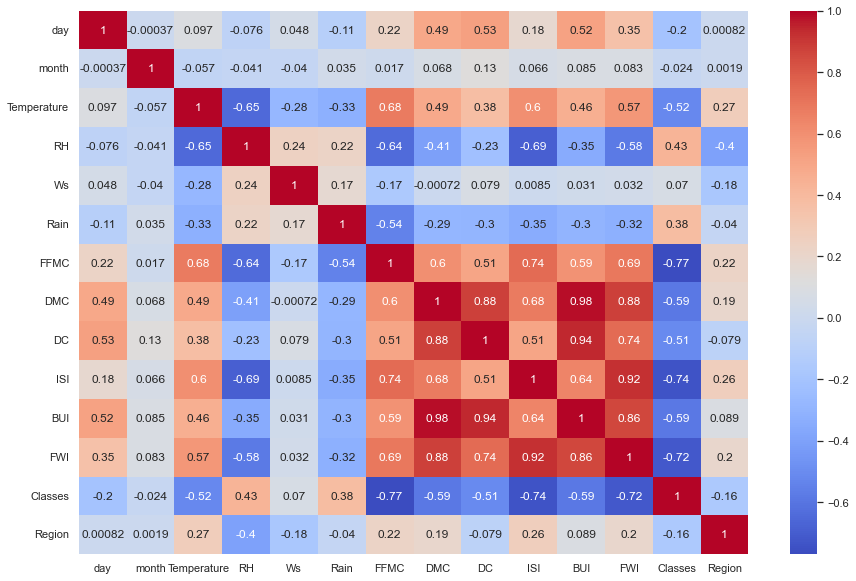

In [171]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data_algerian.corr(), annot=True, cmap='coolwarm')

##### Report 
- Rain is negatively correlated with DC (Drought Code), ISI (Initial Spread Index), FWI (Fire Weather Index) bcoz all these get reduced when rain is more
- RH is strongly negatively correlated with FWI, ISI, BUI, DMC

##### Histogram
- A histogram is a nice visualization tool that helps us to see the distribution of the values for a variable, whether or not the variable has a skewed distn

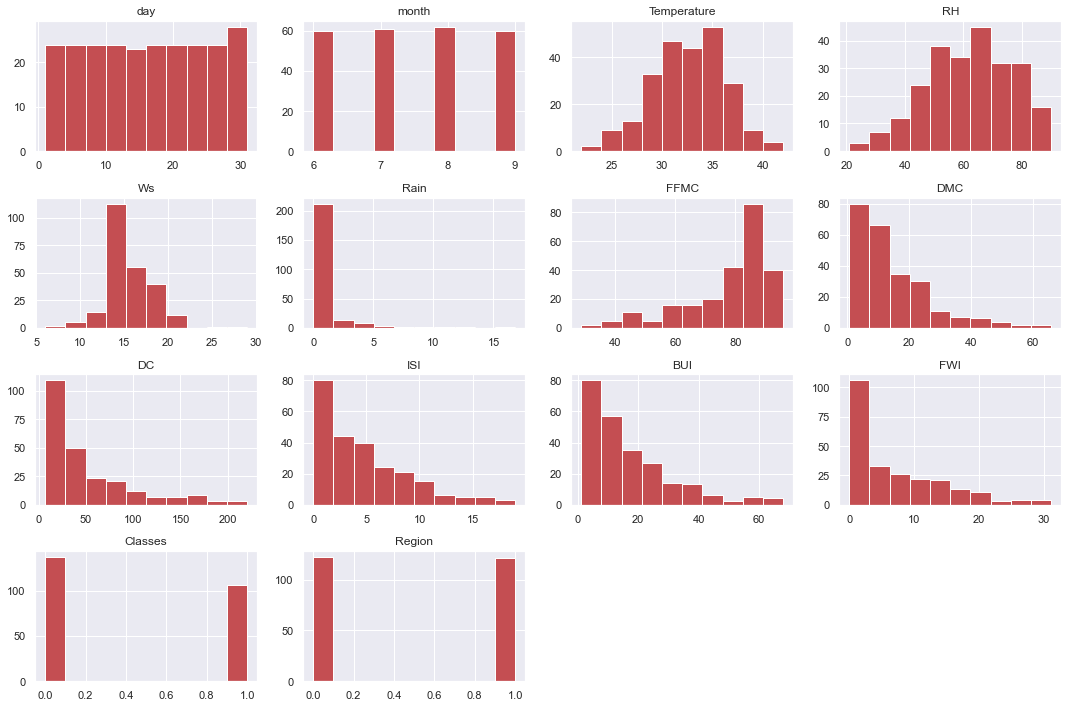

In [173]:
data_algerian.hist(figsize=(15,10), color='r')
plt.tight_layout()

##### Report
- Temperature & Ws has a symm distn
- Rest all the variables has a skewed distn

#### Pie Chart for Fire Class

In [177]:
percentage = (data_algerian['Classes'].value_counts() / len(data_algerian)) * 100

In [178]:
percentage

0    56.378601
1    43.621399
Name: Classes, dtype: float64

Text(0.5, 1.0, 'Pie Chart describing the Percentage of Fire & Not Fire Areas')

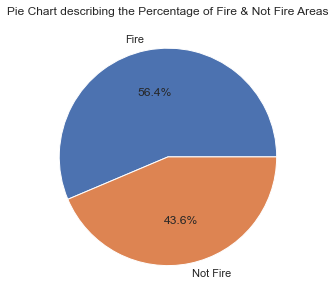

In [183]:
plt.figure(figsize=(5,5))
plt.pie(percentage, labels=['Fire', 'Not Fire'], autopct="%1.1f%%")
plt.title('Pie Chart describing the Percentage of Fire & Not Fire Areas')

## Model Building Using Logistic Regression


In [186]:
# Separating the predictors & response variable
X = data_algerian.drop(labels=['Classes'], axis=1)
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [188]:
y = data_algerian['Classes']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [189]:
# Creating the Train & Test Set
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.33)

## Feature Scaling

In [191]:
# Standardizing
from sklearn.preprocessing import StandardScaler

In [192]:
scalar = StandardScaler()

In [193]:
X_train_std = scalar.fit_transform(X_train)

In [200]:
X_test_std = scalar.transform(X_test)  # To prevent Data Leakage

In [195]:
# Creating the Logistic Regrassion Model
from sklearn.linear_model import LogisticRegression

In [196]:
logistic_reg = LogisticRegression()

In [197]:
# Fitting the training Data over the model
logistic_reg.fit(X_train_std, y_train)

LogisticRegression()

In [202]:
predictions = logistic_reg.predict(X_test_std)

In [203]:
# Training Score
logistic_reg.score(X_train_std, y_train)

0.9814814814814815

In [204]:
# Test Score
logistic_reg.score(X_test_std, y_test)

0.9506172839506173

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
# Calculating the model accuracy
accuracy_score(y_test, predictions)

0.9506172839506173

In [207]:
# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix

In [212]:
conf_mat = confusion_matrix(y_test, predictions)  # confusion_mat(rows, cols)
# rows = actuals
# columns = predicted
conf_mat

array([[43,  0],
       [ 4, 34]], dtype=int64)

In [213]:
TP = conf_mat[0][0]
TN = conf_mat[1][1]
FN = conf_mat[0][1]
FP = conf_mat[1][0]

In [214]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

In [215]:
accuracy

0.9506172839506173

#### Hence, our Logistic Regression Classifier has an Accuracy of 95%

In [216]:
precision = (TP) / (TP + FP)
precision

0.9148936170212766

#### Hence, our Logistic Regression Classifier has a Precision of 91.4%

In [217]:
recall = TP / (TP + FN)
recall

1.0

#### Hence, our Logistic Regression Classifier has a Recall of 100%